In [1]:
import os
os.getcwd()
os.chdir('/home/ha4351/repos/python-pizza')

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from solargeneration.get_solardata import df as solardata

array([<AxesSubplot:xlabel='DATE_TIME'>, <AxesSubplot:xlabel='DATE_TIME'>,
       <AxesSubplot:xlabel='DATE_TIME'>], dtype=object)

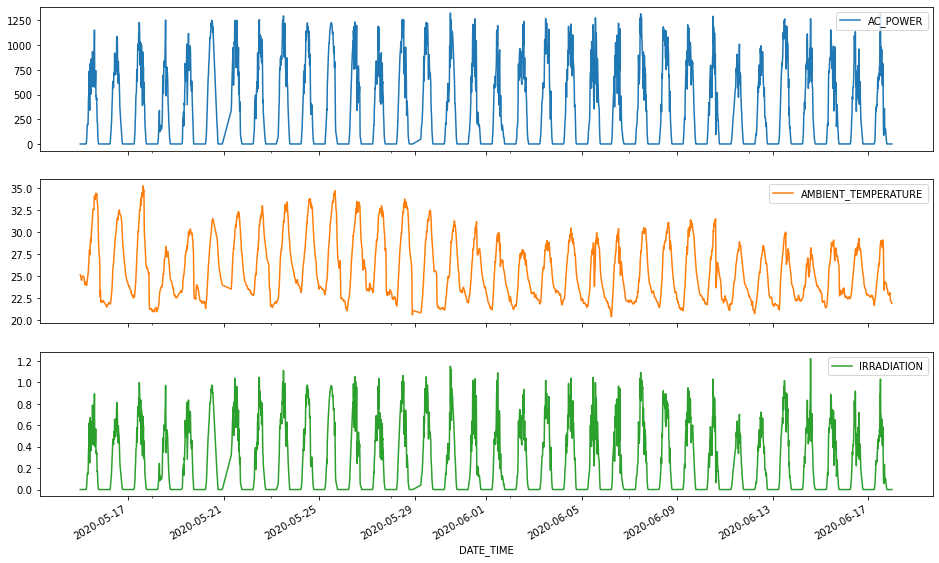

In [3]:
solardata.plot(subplots=True, figsize=(16,10))

## Linære sammenheinger
Vi ser her at AZ_POWER og IRRADIATION er lineært korrelert. Dette stemmer overens med hva vi vet om solcellepanel.
Må passe seg for [spurious-correlations](http://www.tylervigen.com/spurious-correlations). AMBIENT_TEMPERATURE ser ikke så bra ut. Men, vi vet at varme kan påvirke effektivitet av solceller. Kanskje det er noen andre ikke lineære eller tidsforskyvede sammenhenger vi kan utforske?

<AxesSubplot:xlabel='AC_POWER', ylabel='AMBIENT_TEMPERATURE'>

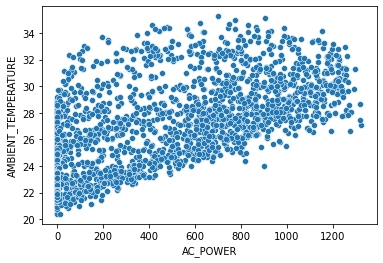

In [4]:
sns.scatterplot(x='AC_POWER', y='AMBIENT_TEMPERATURE', data=solardata)

<AxesSubplot:xlabel='AC_POWER', ylabel='IRRADIATION'>

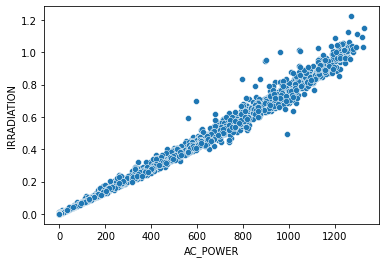

In [6]:
sns.scatterplot(x='AC_POWER', y='IRRADIATION', data=solardata)

## Trene modell

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    solardata['IRRADIATION'], solardata['AC_POWER'], shuffle=False
)

In [18]:
model = linear_model.LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

## Resultater

In [21]:
y_pred = model.predict(X_test.values.reshape(-1, 1))

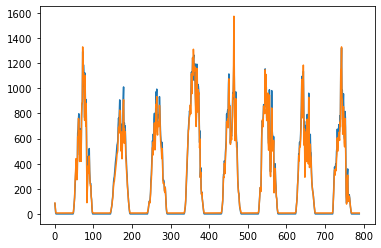

In [28]:
plt.plot(y_test.values)
plt.plot(y_pred)

In [31]:
print(
    'Metrics\n Mean squared error: {}\n Mean absolute error: {}\n r2 score: {}'.format(
        metrics.mean_squared_error(y_test, y_pred),
        metrics.mean_absolute_error(y_test, y_pred),
        metrics.r2_score(y_test, y_pred)
    )
)

Metrics
 Mean squared error: 1128.8161044675337
 Mean absolute error: 21.592764247771846
 r2 score: 0.9909741853553256
